In [2]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
x = df['Age'].mean()
x

29.69911764705882

In [10]:
df['Age'] = df['Age'].fillna(x)

In [9]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
pd.pivot_table(data=df,index='Survived', columns='Sex', values='PassengerId', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [12]:
pd.pivot_table(df, index='Survived', values='Age', aggfunc='mean')

,Age
Survived,
0,30.415100
1,28.549778


In [13]:
pd.pivot_table(df, index='Survived', values='Fare', aggfunc='mean')

,Fare
Survived,
0,22.117887
1,48.395408


<Axes: >

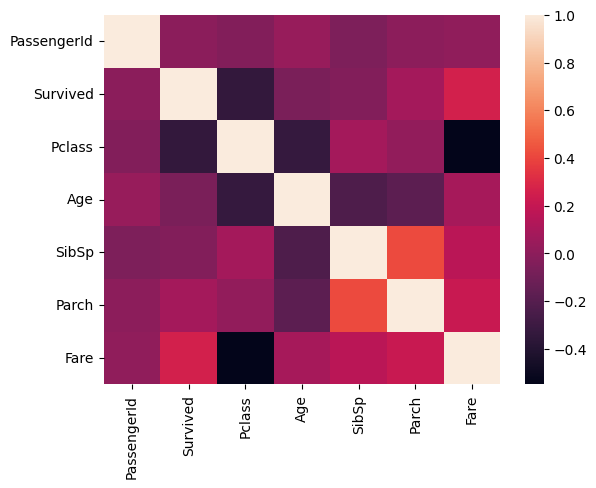

In [14]:
sns.heatmap(df.corr(numeric_only=True))

In [16]:
pd.pivot_table(df, index='Survived', values='Parch', aggfunc='mean')

,Parch
Survived,
0,0.329690
1,0.464912


In [17]:
# we know that the most important features are Parch, Fare, and Pclass in ascending order in terms of importance (assumed by correlation)

In [18]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [38]:
lr = LogisticRegression()
xtrain = df[['Parch', 'Fare', 'Pclass']]
ytrain = df['Survived']

In [39]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [42]:
dft = pd.read_csv('test.csv')

In [43]:
dft[dft['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [44]:
dft['Fare'] = dft['Fare'].fillna(dft['Fare'].mean())

In [45]:
dft[dft['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [47]:
dft[dft['Parch'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [48]:
dft[dft['Pclass'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [49]:
xtest = dft[['Parch','Fare','Pclass']]

In [51]:
output = lr.predict(xtest)

In [58]:
data = {'PassengerId': dft['PassengerId'], 'Survived': output}

In [59]:
resDf = pd.DataFrame(data)

In [62]:
resDf.to_csv('result.csv', index=False)